# 13.3.2 Diferenciación hacia atrás para MLPs

**MLP con una o más capas ocultas:** $\;$ por ejemplo, con una capa oculta y pérdida cuadrática, $\,m=1\,$ y $\,n=n_1\geq 1$
$$\mathcal{L}((\boldsymbol{x}, \boldsymbol{y}),\boldsymbol{\theta})%
=\frac{1}{2}\lVert\boldsymbol{y}-\mathbf{W}_2\varphi(\mathbf{W}_1\boldsymbol{x})\rVert^2$$

**MLP como composición de $K$ capas:** $\quad\boldsymbol{f}_k(\boldsymbol{x},\boldsymbol{\theta}_k),\,\boldsymbol{\theta}_k\in\mathbb{R}^{D_k},\,$ denota la función de la capa $k;\,$ $K=4$ en el ejemplo
$$\begin{align*}
\boldsymbol{x}_2&=\boldsymbol{f}_1(\boldsymbol{x},\boldsymbol{\theta}_1)=\mathbf{W}_1\boldsymbol{x}\in\mathbb{R}^{n_2}\\%
\boldsymbol{x}_3&=\boldsymbol{f}_2(\boldsymbol{x}_2,\emptyset)=\varphi(\boldsymbol{x}_2)\in\mathbb{R}^{n_3}\\%
\boldsymbol{x}_4&=\boldsymbol{f}_3(\boldsymbol{x}_3,\boldsymbol{\theta}_3)=\mathbf{W}_2\boldsymbol{x}_3\in\mathbb{R}^{n_4}\\%
\mathcal{L}&=\boldsymbol{f}_4(\boldsymbol{x}_4, \boldsymbol{y})=\frac{1}{2}\lVert\boldsymbol{x}_4-\boldsymbol{y}\rVert^2%
\end{align*}$$

**Cálculo de gradientes:** $\quad\displaystyle\frac{\partial\mathcal{L}}{\partial\boldsymbol{\theta}_k}=(\nabla_{\boldsymbol{\theta}_k}\mathcal{L})^t\in\mathbb{R}^{1\times D_k}\;$ a partir de $\,\displaystyle\frac{\partial\mathcal{L}}{\partial\boldsymbol{x}_K}\,$ y las Jacobianas $\,\displaystyle\frac{\partial\boldsymbol{x}_k}{\partial\boldsymbol{x}_{k-1}}=\mathbf{J}_{\boldsymbol{f}_{k-1}}(\boldsymbol{x}_{k-1})\in\mathbb{R}^{n_k\times n_{k-1}}$
$$\begin{align*}
\frac{\partial\mathcal{L}}{\partial\boldsymbol{\theta}_3}%
&=\frac{\partial\mathcal{L}}{\partial\boldsymbol{x}_4}%
\frac{\partial\boldsymbol{x}_4}{\partial\boldsymbol{\theta}_3}\\%
\frac{\partial\mathcal{L}}{\partial\boldsymbol{\theta}_2}%
&=\frac{\partial\mathcal{L}}{\partial\boldsymbol{x}_4}%
\frac{\partial\boldsymbol{x}_4}{\partial\boldsymbol{x}_3}%
\frac{\partial\boldsymbol{x}_3}{\partial\boldsymbol{\theta}_2}\\%
\frac{\partial\mathcal{L}}{\partial\boldsymbol{\theta}_1}%
&=\frac{\partial\mathcal{L}}{\partial\boldsymbol{x}_4}%
\frac{\partial\boldsymbol{x}_4}{\partial\boldsymbol{x}_3}%
\frac{\partial\boldsymbol{x}_3}{\partial\boldsymbol{x}_2}%
\frac{\partial\boldsymbol{x}_2}{\partial\boldsymbol{\theta}_1}%
\end{align*}$$

**Algoritmo backprop:** $\;$ para un MLP de $K$ capas

*   **Paso forward:** $\quad\boldsymbol{x}_1=\boldsymbol{x};\qquad$**para** $\;k=1:K:\quad\boldsymbol{x}_{k+1}=\boldsymbol{f}_k(\boldsymbol{x}_k,\boldsymbol{\theta}_k)$

*   **Paso backward:** $\quad\boldsymbol{u}_{K+1}=\boldsymbol{1};\qquad$**para** $\;k=K:1:\quad\boldsymbol{g}_k=\boldsymbol{u}_{k+1}^t\dfrac{\partial\boldsymbol{f}(\boldsymbol{x}_k,\boldsymbol{\theta}_k)}{\partial\boldsymbol{\theta}_k}\quad\boldsymbol{u}_k=\boldsymbol{u}_{k+1}^t\dfrac{\partial\boldsymbol{f}(\boldsymbol{x}_k,\boldsymbol{\theta}_k)}{\partial\boldsymbol{x}_k}$

*   **Retorna:** $\quad\mathcal{L}=\boldsymbol{x}_{K+1}$ $\quad\boldsymbol{\nabla}_{\boldsymbol{x}}\mathcal{L}=\boldsymbol{u}_1$ $\quad\{\boldsymbol{\nabla}_{\boldsymbol{\theta}_k}\mathcal{L}=\boldsymbol{g}_k:k=1:K\}$

## MLP con capa oculta de dos unidades para XOR
$$\begin{align*}
\boldsymbol{x}&=(x_1,x_2)\in\{0, 1\}^D%
&&\text{donde}\quad D=2\\%
\boldsymbol{z}&=\mathbf{W}\boldsymbol{x}+\boldsymbol{b}_1\in\mathbb{R}^2%
&&\text{donde}\quad\mathbf{W}\in\mathbb{R}^{2\times D}\;\text{y}\;\boldsymbol{b}_1\in\mathbb{R}^2\\%
\boldsymbol{h}&=\operatorname{ReLU}(\boldsymbol{z})\in\mathbb{R}^2\\%
\boldsymbol{a}&=\mathbf{V}\boldsymbol{h}+\boldsymbol{b}_2\in\mathbb{R}^C%
&&\text{donde}\quad C=2,\,\mathbf{V}\in\mathbb{R}^{C\times 2}\;\text{y}\;\boldsymbol{b}_2\in\mathbb{R}^C\\%
\hat{\boldsymbol{y}}&=\mathcal{S}(\boldsymbol{a})\in[0,1]^C%
&&\text{probabilidades de las clases $0$ y $1$}\\%
\mathcal{L}&=\operatorname{CrossEntropy}(\boldsymbol{y},\hat{\boldsymbol{y}})\in\mathbb{R}%
\end{align*}$$

**Modelo inicial:** $\quad\mathbf{W}=\begin{pmatrix}1&1\\1&1\end{pmatrix}\quad \boldsymbol{b}_1=\begin{pmatrix}-1\\0.5\end{pmatrix}\quad \mathbf{V}=\begin{pmatrix}1&-1\\-1&1\end{pmatrix}\quad\boldsymbol{b}_2=\begin{pmatrix}1\\-1\end{pmatrix}$

In [4]:
import numpy as np; np.set_printoptions(precision=4); import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]]) # etiquetas one-hot
W = tf.constant_initializer([[1, 1], [1, 1]]); b1 = tf.constant_initializer([-1,  .5])
V = tf.constant_initializer([[1, -1], [-1, 1]]); b2 = tf.constant_initializer([ 1, -1])
L1 = keras.layers.Dense(2, activation=tf.nn.relu, input_dim=2, kernel_initializer=W, bias_initializer=b1)
L2 = keras.layers.Dense(2, activation=tf.nn.softmax, kernel_initializer=V, bias_initializer=b2)
M = keras.Sequential([L1, L2]); M.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento:** $\;$ cada iteración o época de SGD requiere un forward-backward de backprop

1/1 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 1.0000


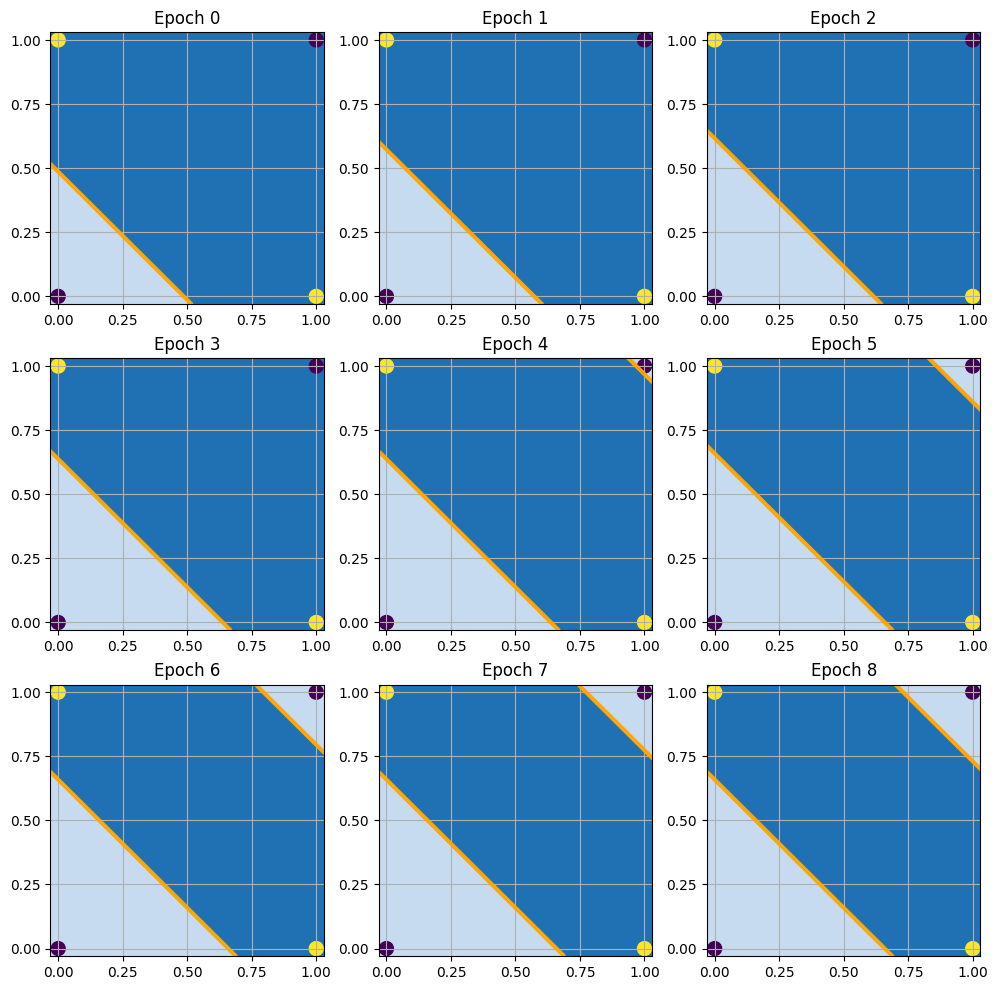

In [2]:
optimizer = tf.optimizers.SGD(learning_rate=0.1)
M.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
epochs = 9; nrows = ncols = int(np.ceil(np.sqrt(epochs)));
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
for epoch in np.arange(epochs):
    ax = axes.flat[epoch]; ax.set_title(f'Epoch {epoch}'); ax.grid();
    ticks = [.0, .25, .5, .75, 1.]; ax.set_xticks(ticks); ax.set_yticks(ticks)
    yy = np.argmax(M.predict(XX, verbose=0), axis=1)
    ax.contour(x1, x2, yy.reshape(x1.shape), 1, colors='orange', linestyles='solid')
    ax.contourf(x1, x2, yy.reshape(x1.shape), 1, cmap='Blues')
    ax.scatter(*X.T, c=np.argmax(y, axis=1), s=100)
    M.fit(X, y, epochs=1, verbose=1);

**Modelo final:** $\;$ tras muchas épocas y reduciendo el learning rate paulatinamente, se llega a un MLP diferenciable que induce las mismas regiones de decisión que el ejemplo de MLP no diferenciable para XOR

$$\quad W=\begin{pmatrix}3.70&2.79\\3.70&2.79\end{pmatrix}\quad\boldsymbol{b}_1=\begin{pmatrix}-3.7\\0\end{pmatrix}\quad V=\begin{pmatrix}4.71&-3.74\\-3.12&2.11\end{pmatrix}\quad\boldsymbol{b}_2=\begin{pmatrix}3\\-3.5\end{pmatrix}$$

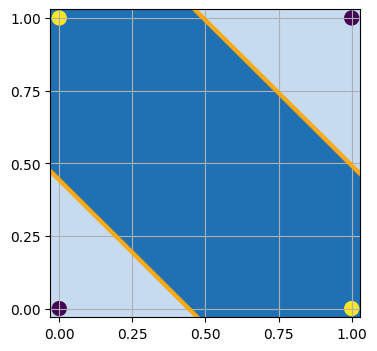

In [3]:
W1 = tf.constant_initializer([[3.70,  2.79], [3.70, 2.79]]); b1 = tf.constant_initializer([-3.70, 0.00])
W2 = tf.constant_initializer([[4.71, -3.74], [-3.12, 2.11]]); b2 = tf.constant_initializer([3.00, -3.50])
L1 = keras.layers.Dense(2, activation=tf.nn.relu, input_dim=2, kernel_initializer=W1, bias_initializer=b1)
L2 = keras.layers.Dense(2, activation=tf.nn.softmax, kernel_initializer=W2, bias_initializer=b2)
M = keras.Sequential([L1, L2]);
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.grid(); ticks = [.0, .25, .5, .75, 1.]; ax.set_xticks(ticks); ax.set_yticks(ticks)
yy = np.argmax(M.predict(XX, verbose=0), axis=1)
ax.contour(x1, x2, yy.reshape(x1.shape), 1, colors='orange', linestyles='solid')
ax.contourf(x1, x2, yy.reshape(x1.shape), 1, cmap='Blues')
ax.scatter(*X.T, c=np.argmax(y, axis=1), s=100);